<a href="https://colab.research.google.com/github/AlexandreXavierMartins/ProblemaDaMochila/blob/main/BuscaTabu%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Média =  16.85


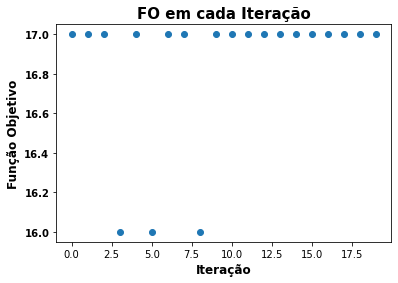

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

def busca_tabu(s, fo, b, p, n, pena, Tam, iter_max, cap):
  #Inicializa
  fo_star = fo
  s_star = n*[0]
  for i in range(n):
    s_star[i] = s[i]
  iter = 0
  best_iter = 0
  Lista = []
  #Enquanto critério Procura melhor vizinho
  while iter - best_iter < iter_max:
    iter = iter + 1;
    best_i = -1
    best_delta = -math.inf
    #print('Solução = ', s)
    for i in range(n):
      s[i] = 1 - s[i]
      f = calcula_fo(b, p, s, n, cap, pena)
      s[i] = 1 - s[i]
      delta = f - fo
      if delta > best_delta:
        if Lista.count(i) == 0:
          best_delta = delta
          best_i = i
        else:
          if f > fo_star:
            best_delta = delta
            best_i = i
    
    if best_i == -1:
      return print('Erro')
#Atualiza a Lista tabu
    #print('Best i = ', best_i)
    #print('Best delta = ', best_delta)
    Lista.append(best_i)
    if(len(Lista) > Tam):
      Lista.pop(0)
    #print(Lista)
    s[best_i] = 1 -s[best_i]
    fo = fo + best_delta
    if fo > fo_star:
      #print('Melhorou! Sol = ', fo)
      fo_star = fo
      best_iter = iter
      for i in range(n):
        s_star[i] = s[i]

  return fo_star, s_star
  #Verifica se atualiza melhor solução
  #Retorna a melhor solução


def gera_sol(s, n, taxa):
  for i in range(n):
    x = np.random.random()
    if x < taxa:
      s[i] = 1
  return s

def calcula_fo(b, p, s, n, cap, pena):
  fo = 0
  pt = 0
  for i in range(n):
    fo = fo + s[i]*b[i]
    pt = pt + s[i]*p[i]
  if pt > cap:
    #print('Solução inviável')
    fo = fo -pena*(pt - cap)
  return fo

#DADOS DO PROBLEMA-------------------#
n = 8 #Quantidade de objetos
beneficio = [4, 3, 2, 6, 2, 3, 5, 4]
peso =      [5, 4, 3, 9, 4, 2, 6, 7]
cap = 20 #Capacidade da mochila
#------------------------------------#
#ESTATÍSTICAS------------------------#
fo_inicial = []
fo_final = []
xlabel = []
media = 0
#------------------------------------#
#PARÂMETROS--------------------------#
penalidade = 2 #Penalidade por solução inviável
taxa = 0.50    #Taxa para gerar sol. inicial, deve ser entre (0,1)

itermax = 20
Tam = int(n/2)+1
#------------------------------------#

experimentos = 20
for seed in range(experimentos):
  xlabel.append(seed)
  sol_star = n*[0]
  fo_star = -math.inf 
  np.random.seed(seed)
  sol = n*[0] #Vetor para guardar a Solução
  gera_sol(sol, n, taxa)
  fo = calcula_fo(beneficio, peso, sol, n, cap, penalidade)
  for i in range(n):
    sol_star[i] = sol[i]
  fo_star = fo
  fo_star, sol_star = busca_tabu(sol, fo, beneficio, peso, n, penalidade, Tam, itermax, cap)


  media = media + fo_star
  fo_final.append(fo_star)

media = media/experimentos
#print('Melhor solução = ', fo_star)
#print('Melhor iteração =', best_iter)
print('Média = ', media)
#plt.scatter(xlabel, fo_inicial)
plt.scatter(xlabel, fo_final)
plt.title("FO em cada Iteração", fontsize = 15, fontweight = 'bold')
plt.xlabel("Iteração", fontsize = 12, fontweight = 'bold')
plt.ylabel("Função Objetivo", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight='bold')
plt.show()